#### When subjecting your data to machine learning the training is sensitive to the scale of the features. If this is not handled before training two issues may arise: (1) the model performance will suffer, and (2) solving for coefficients is problematic as smaller feature values will be dominated by larger ones.

#### These issues are alieviated by normalizing or standardizing your data. Let's look at _normalizing_.

# What Is "_Normal_?" 

Normalizing your dataset is a rescaling technique that will place all values in your data between 0 and 1 (note that we do not _have_ to scale between just 0 and 1...). This may not be required by _all_ machine learning algorithms (though some, like linear regression, kNN and ANNs, require it), but it can be useful. It is accomplished through the equation:

$
z = \frac{x - \min{(x)}}{\max{(x)} - \min{(x)}}
$

The requirement here is that we must be able to estimate the minimum and maximum values observed in the data. This may be difficult with time series data that has up or down trends, so normalization may not be in your best interest at that point.

We will look at normalaizing data with three different packages:
+ Pandas
+ SciKit Learn's Preprocessing
+ SciKit Learn's MinMaxScaler (also part of Preprocessing)

Regardless of what we use, we are essentially fitting a scaler with your training data, applying that scale to the trining data, and then applying that scale to all your data moving forward.

## With SK Learn's MinMaxScaler

In [1]:
# Import what I need
from pandas import Series  # Gimme the series
from sklearn.preprocessing import MinMaxScaler  # Gimme the tools

In [2]:
# Import the data
series = Series.from_csv('data/daily-minimum-temperatures-in-me.csv', header=0)

/home/cjohn033/miniconda3/envs/py3-learn/lib/python3.5/site-packages/pandas/core/series.py:3727: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)


In [3]:
# Peek at the data
series.head()

Date
1981-01-01    20.7
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
Name: Daily minimum temperatures in Melbourne, Australia, 1981-1990, dtype: object

In [4]:
series.tail()

Date
1990-12-27    14.0
1990-12-28    13.6
1990-12-29    13.5
1990-12-30    15.7
1990-12-31    13.0
Name: Daily minimum temperatures in Melbourne, Australia, 1981-1990, dtype: object

In [5]:
# Remove a few pesky values
series = series[~((series == '?0.1') | (series == '?0.2') | (series == '?0.8'))]

In [6]:
# Prep the data for transforming
values = series.values
values = values.reshape((len(values), 1))

In [7]:
# Train and fit the normalization
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(values)

/home/cjohn033/miniconda3/envs/py3-learn/lib/python3.5/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [8]:
# Check min and max values in the data
print('Min: %f, Max: %f' % (scaler.data_min_, scaler.data_max_))

Min: 0.000000, Max: 26.300000


In [9]:
# Normalize data
normalized = scaler.transform(values)

In [10]:
# Inspect the first 5 rows
for i in range(5):
    print(normalized[i])

[0.78707224]
[0.68060837]
[0.7148289]
[0.55513308]
[0.60076046]


In [11]:
# Perform the inverse transform
inversed = scaler.inverse_transform(normalized)

In [12]:
# Look at the first 5 rows after inverse transform
for i in range(5):
    print(inversed[i])

[20.7]
[17.9]
[18.8]
[14.6]
[15.8]


## With SK Learn Preprocessing

In [13]:
# Import what we need
import numpy as np  # Gimme the linear algebras
import pandas as pd  # Gimme the data handling stuff
from sklearn import preprocessing  # Gimme the preprocessing tools
# Lemme see
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# Import the data from the web
df = pd.read_csv('data/housing.csv')

In [15]:
# What's the shape?
df.shape

(20640, 10)

In [16]:
# Drop the null values for the example here
df = df.dropna()

In [17]:
# What's the shape after the drop?
df.shape

(20433, 10)

In [18]:
# Have a peek at the data
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [19]:
df.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [20]:
# Normalize the total bedrooms field
x_array = np.array(df['total_bedrooms'])  # declare the array to be normalized
normalized_X = preprocessing.normalize([x_array])

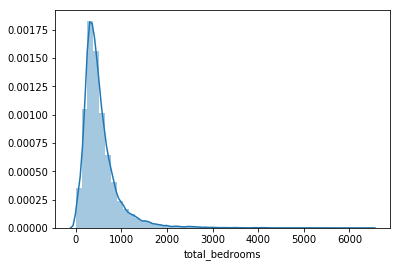

In [21]:
# Look at the data before normalizing
_ = sns.distplot(df.total_bedrooms)

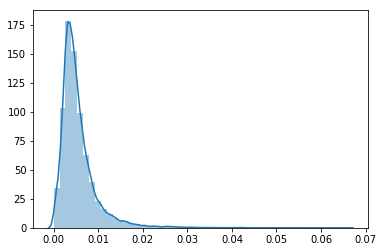

In [22]:
# Look at the normalized data, look at the x-axis
_ = sns.distplot(normalized_X)

Note that the shape of the distribution does not change. That's the point. We now see that our values are between (inclusive) 0 and 1, and any outliers have been included in this scaling. This consistency with the data enables us to better evaluate a model's output. If we attempted a pass with modeling prior to normalizing we may have run into a situation where vector convergence may not have occured. Now that they are scaled, we are better set for convergence.

What happens if we don't have convergence? Well, that depends. It could be a coincidence that you might see okeedokee output from your model, but what if you want to optimize that bad Moto Guzzi? If you have convergence, you have a candidate for optimization.

## With Pandas

A reason we might want to use this method is because the SciKit Learn Preporcessing Standard Scaler works only on Numpy arrays (when you convert dataframes to Numpy arrays you lose column names).

In [23]:
# Import the stuff we need
import pandas as pd  # Gimme the data handling stuff

In [24]:
# Import the data
data = pd.read_csv('data/data.csv')

In [25]:
# Have a looksy
data.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [26]:
data.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [27]:
data.shape

(569, 33)

In [28]:
# As shown by Mr. Jindal, this function will map diagnosis to an integer value
def mapping(data, feature):
    feature_map = dict()
    count = 0
    
    for i in sorted(data[feature].unique(), reverse=True):
        feature_map[i] = count
        count += 1
        
    data[feature] = data[feature].map(feature_map)
    
    return(data)
    

In [29]:
# Perform the mapping
data = mapping(data, 'diagnosis')

In [30]:
# drop columns we don't need
data = data.drop(['id', 'Unnamed: 32'], axis=1)

In [31]:
# Inspect a sample of the data
data.sample(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
418,1,12.70,12.17,80.88,495.0,0.08785,0.05794,0.02360,0.02402,0.1583,...,13.65,16.92,88.12,566.9,0.1314,0.1607,0.09385,0.08224,0.2775,0.09464
386,1,12.21,14.09,78.78,462.0,0.08108,0.07823,0.06839,0.02534,0.1646,...,13.13,19.29,87.65,529.9,0.1026,0.2431,0.30760,0.09140,0.2677,0.08824
432,0,20.18,19.54,133.80,1250.0,0.11330,0.14890,0.21330,0.12590,0.1724,...,22.03,25.07,146.00,1479.0,0.1665,0.2942,0.53080,0.21730,0.3032,0.08075
381,1,11.04,14.93,70.67,372.7,0.07987,0.07079,0.03546,0.02074,0.2003,...,12.09,20.83,79.73,447.1,0.1095,0.1982,0.15530,0.06754,0.3202,0.07287
254,0,19.45,19.33,126.50,1169.0,0.10350,0.11880,0.13790,0.08591,0.1776,...,25.70,24.57,163.10,1972.0,0.1497,0.3161,0.43170,0.19990,0.3379,0.08950


In [32]:
# Normalizing a single column between 0 and 10
data.concavity_mean = ((data.concavity_mean - data.concavity_mean.min()) / 
                      (data.concavity_mean.max() - data.concavity_mean.min())) * 10

In [33]:
# Look at another sample
data.concavity_mean.sample(5)

529    0.885895
8      4.355670
531    0.984067
68     7.333646
62     5.002343
Name: concavity_mean, dtype: float64

In [34]:
# Normalizing an entire data frame
norm_df = ((data - data.min()) / 
           (data.max() - data.min())) * 10

In [35]:
# Inspect a sample
norm_df.sample(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
23,0.0,6.710682,4.507947,6.454979,5.346766,3.760043,2.540335,2.570291,4.290258,3.580808,...,7.556030,6.281983,6.852433,5.971785,4.551938,2.257764,2.519968,6.903780,2.477824,1.326250
318,10.0,0.975437,3.107880,1.125009,0.428420,4.247540,5.454267,4.627460,2.439364,6.414141,...,0.757737,3.033049,0.906918,0.275020,3.363270,3.371559,3.681310,3.934708,3.094816,3.309721
64,0.0,2.697241,4.778492,2.688135,1.507953,5.377810,3.276486,2.642924,3.416004,4.267677,...,3.258627,5.716951,3.057423,1.728028,7.523608,3.675234,3.214058,5.896907,3.583678,3.152302
419,10.0,1.977850,3.956713,1.876857,1.004454,4.438928,1.239188,0.209817,0.534791,2.803030,...,1.575952,4.504264,1.436825,0.670468,3.766097,0.810218,0.286102,1.479725,2.781392,1.061918
337,0.0,5.579535,3.963476,5.466796,4.023330,3.478379,3.705908,2.483599,3.026839,4.510101,...,5.908929,5.956823,5.512725,4.148152,5.192498,4.418411,3.701278,7.037801,4.167159,2.863702


In [36]:
# Norm just a few columns in the dataframe
def normalize(dataset, colname):
    norm_data = ((dataset - dataset.min()) /
                (dataset.max() - dataset.min())) * 10
    norm_data[colname] = dataset[colname]
    
    return(norm_data)

In [37]:
# Specify diagnosis as the column we don't want to nromalize
norm_col_df = normalize(data, 'diagnosis')

In [38]:
# Inspect a sample
norm_col_df.sample(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
556,1,1.504567,3.341224,1.447032,0.713468,4.303512,1.707257,0.117737,0.554672,3.691919,...,0.967627,2.894456,0.870063,0.398398,3.653833,0.899477,0.080272,0.767010,1.373940,0.812016
207,0,4.746557,3.567805,4.554626,3.227147,3.167825,1.645911,1.628397,2.678926,4.878788,...,4.222697,3.472814,3.963843,2.518679,2.636862,1.176956,1.543131,3.766323,3.370787,0.632953
223,0,4.150220,3.564423,4.063990,2.620573,4.502122,3.098583,2.687441,3.211730,4.419192,...,4.137318,4.869403,3.759649,2.218836,5.549099,4.081749,3.175719,5.082474,4.786123,3.368752
98,1,2.186095,1.058505,2.111119,1.141463,3.358310,1.713699,0.983130,1.665010,2.828283,...,1.824973,1.369936,1.621097,0.804414,4.750050,1.531081,1.535144,2.903436,2.379263,2.133018
426,1,1.656018,1.782212,1.637758,0.806363,4.110319,2.512729,1.484302,1.102386,4.368687,...,1.494130,2.545309,1.543902,0.627212,4.063264,2.641965,2.347444,3.199313,2.868125,2.716778


### You may not always want to normalize data...

This data is proportional, as in normalizing might not provide correct estimators for your model. Scale between your data features does matter as well, so if it matters in the case of _your_ data, don't normalize. Essentially, be mindful of your data and the outputs you are expecting and whether or not normalization even applies.

There are also cases where having your data being centered around 0, rather than just transforming it so that it lies between 0 and 1. If this is your case then you want _standardization_.